# Part II - Effect of Ford GoBike Member Characteristics on their Trip Duration
## by Wilson Uduma

## Investigation Overview


> In this investigation, I wanted to focus on few of the influences of the categorical variables (user_type, member_gender, bike_share_for_all_trip) with the numerical variables (member_birth_year, duration_sec).


## Dataset Overview

> There are 174,377 individual entries in the dataset with 10 features (duration_sec, start_time, end_time, start_station_name, end_station_name, bike_id, user_type, member_birth_year, member_gender, and bike_share_for_all_trip). Most variables are categorical in nature, but the variable duration are numeric in nature.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike = pd.read_csv('fordgobike-tripdata.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

In [3]:
# convert user_type, member_gender, and bike_share_for_all_trip into ordered categorical types
ordinal_var_dict = {'member_gender': ['Male','Female','Other'],
                    'user_type': ['Customer', 'Subscriber'],
                    'bike_share_for_all_trip': ['Yes', 'No']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    bike[var] = bike[var].astype(ordered_var)

In [4]:
# data wrangling, removing bike entries with inconsistent or missing data.
#making a copy
df = bike.copy()
#dropping null entries
df = df.dropna()
# Make a list of the columns to be dropped
drop_column = ['start_station_id', 'start_station_latitude', 'start_station_longitude',
             'end_station_id','end_station_latitude', 'end_station_longitude']

# Drop the columns 
df.drop(drop_column, axis=1, inplace=True)

#dropping entries with member year < 1948 as they are incorrect
df.drop(df[df['member_birth_year'] <= 1948].index, inplace = True)

# Convert member_birth_year column to integer
df['member_birth_year'] = df['member_birth_year'].astype(int)

## (Distribution of Trip Duration)

> Trip duration of members in the dataset take on a very large range of values, from about  61secs(𝑎𝑡 𝑡ℎ𝑒 𝑙𝑜𝑤𝑒𝑠𝑡), 𝑡𝑜 𝑎𝑏𝑜𝑢𝑡 85444secs (𝑎𝑡 𝑡ℎ𝑒 highest). Plotted on a logarithmic scale, the distribution of duration takes on a right-skewed bell shape.

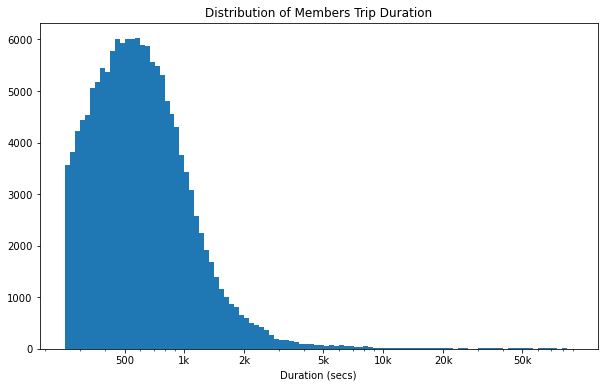

In [5]:
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 6])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.title('Distribution of Members Trip Duration')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4], [500, '1k', '2k', '5k', '10k', '20k','50k'])
plt.xlabel('Duration (secs)')
plt.show()

## (Distribution of Member Birth Years)

> Member birth years is an important variable in the dataset, as it shows the age bracket of all Ford GoBike's members that have gone on a trip. It also tells us that there is a large number of members born between 1980 and 1990.

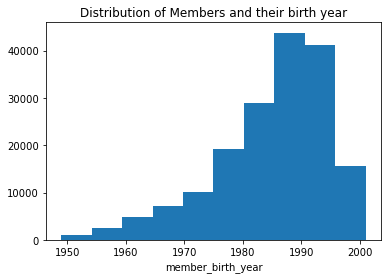

In [6]:
plt.hist(data = df, x = 'member_birth_year')
plt.title('Distribution of Members and their birth year')
plt.xlabel('member_birth_year');

## User Type Vs Duration

The interaction between user_type and duration is necessary to understand what category of members spend more time on the bike. we can see below that customers spent a duration of 1310.75 secs(approx. 21minutes). Subscribers on the other hand, spent a duration of 640 secs (approx. 10minutes). Thus, once can say Customers spent twice as more time on the bikes as Subscribers.

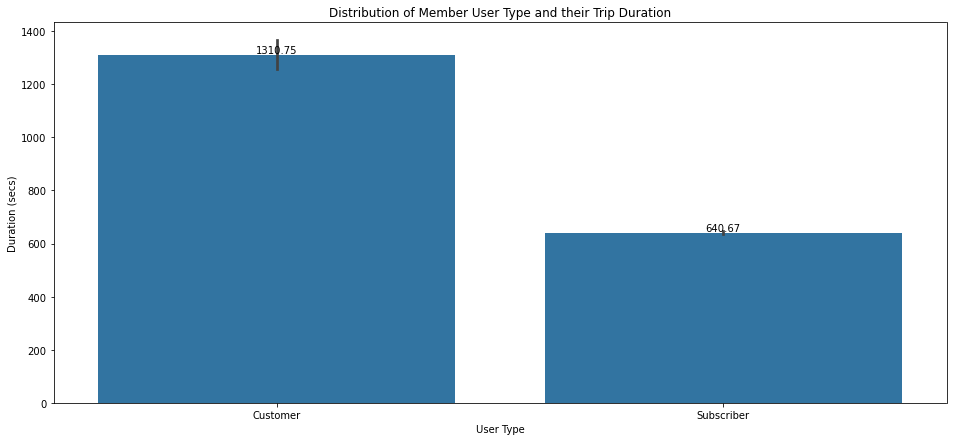

In [7]:
plt.figure(figsize = [16, 7])
base_color = sb.color_palette()[0]
ax1 = sb.barplot(data=df, x='user_type', y='duration_sec', color=base_color)
plt.title('Distribution of Member User Type and their Trip Duration')
plt.xlabel('User Type')
plt.ylabel('Duration (secs)')
plt.xticks()
ax1.bar_label(ax1.containers[0]);

## Member Gender Vs Duration

The member_gender and duration relationship is explored below to understand which gender category of members spent more time on the bike. We can see that males spent 672secs, Others spent 998secs, and female spent 779secs. Thus, we  conclude that Other gender category spent more time on the bikes followed by females and then males.

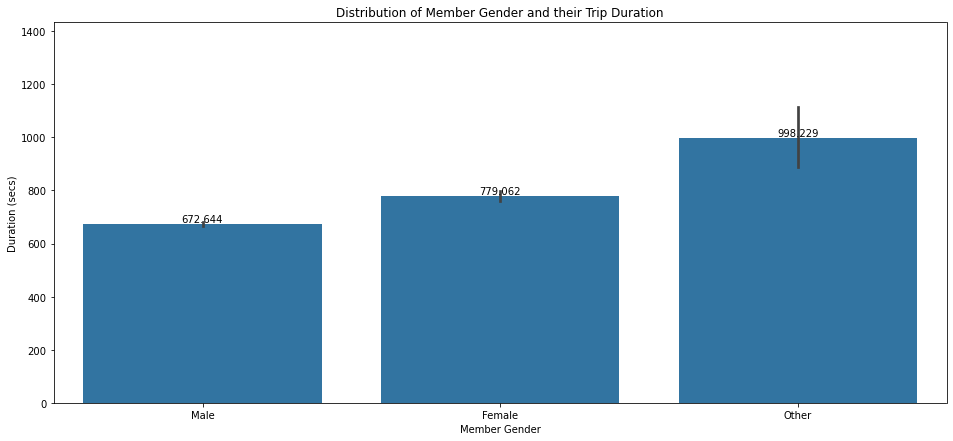

In [8]:
plt.figure(figsize = [16, 7])
base_color = sb.color_palette()[0]
ax = sb.barplot(data=df, x='member_gender', y='duration_sec', color=base_color)
plt.title('Distribution of Member Gender and their Trip Duration')
plt.xticks()
plt.xlabel('Member Gender')
plt.ylabel('Duration (secs)')
plt.ylim(ax1.get_ylim())
ax.bar_label(ax.containers[0]);

## User Type and Member Gender by Duration
This interation between user type, gender and duration displayed below shows us that for each user_type category - Other gender seem to spend more time on their bikes than other genders (with male the least - surprising for a gender category with the highest data)

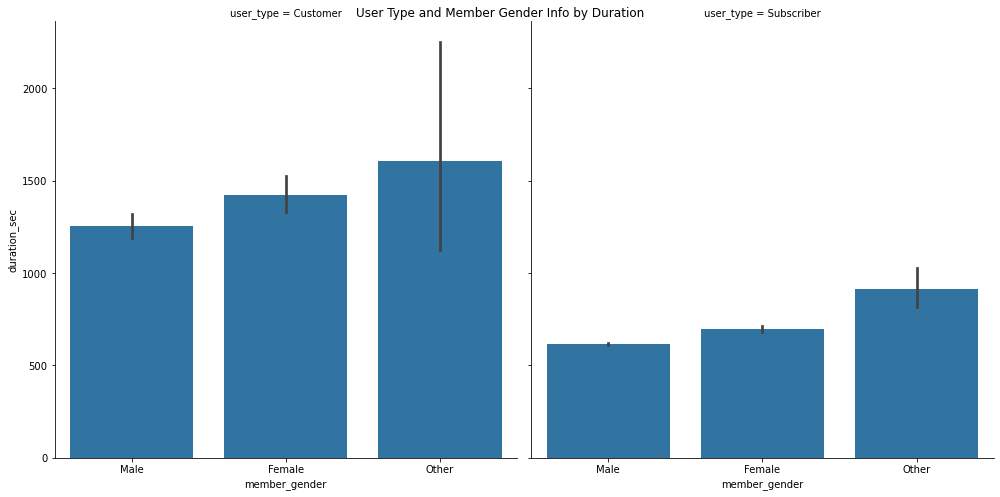

In [9]:
g = sb.FacetGrid(df, col="user_type", height=7)
g.map(sb.barplot, "member_gender", "duration_sec", order=["Male", "Female", "Other"])
g.fig.suptitle("User Type and Member Gender Info by Duration",fontsize=12);

## User Type and Bike Share info by Birth Year
This is quite an interesting interaction between user type, bike share and birth year displayed below, as we can see clearly that no customer bike-shared, thus their birth_year isn't captured. This means that all customers did not bike share and they mostly fall between 1980 and 1990. For Subscribers, we can see that members born around 1995 bike-shared, while those that were born around 1990 did not.

In summary, one can say the younger generations seem to bike share more than older generations.

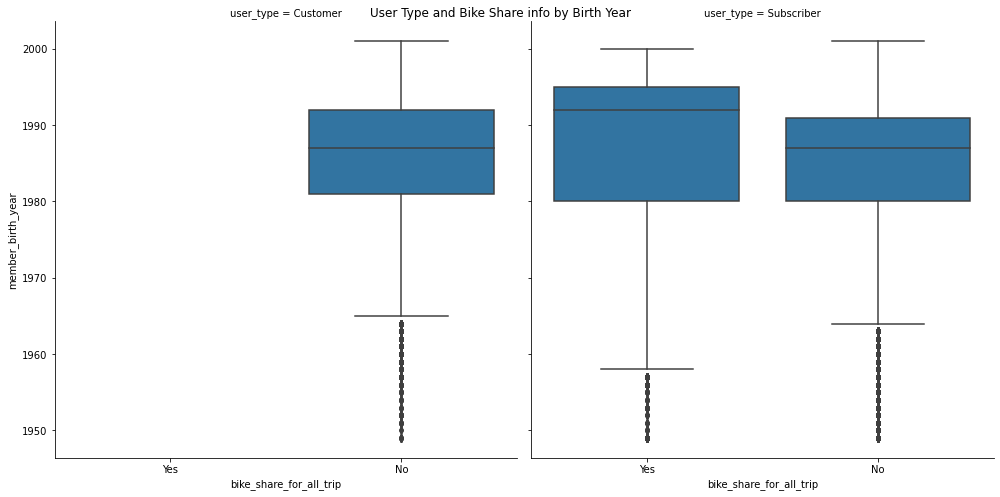

In [10]:
g = sb.FacetGrid(data = df, col = 'user_type', height = 7)
g.map(sb.boxplot, 'bike_share_for_all_trip', 'member_birth_year', order=["Yes", "No"])
g.fig.suptitle("User Type and Bike Share info by Birth Year");

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. From the terminal or command line, use the following expression.

In [11]:
!jupyter nbconvert Part_II_Ford_GoBike_System_Data_Exploration.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_II_Ford_GoBike_System_Data_Exploration.ipynb to slides
[NbConvertApp] Writing 669275 bytes to Part_II_Ford_GoBike_System_Data_Exploration.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_Ford_GoBike_System_Data_Exploration.slides.html
Use Control-C to stop this server
^C

Interrupted


> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 